Descripcion del proyecto
Descripcion del Dataset:
 1) ### Objetivo del documento
El documento pretende mostrar los requerimientos, alcance del proyecto y orden en que se debe vizualizar los notebooks para una correcta conclusión.

- Resumen ejecutivo
- Integración y limpieza de datos
- Exploración de datos & Ingeniería de características

--------------------------------------------------------------------
- Modelado
- Prototipo
- Pruebas unitarias
- Pruebas de integración (pipeline completo ejecutandose)
- Resultados y concluciones (slides)

## Conclusiones
- Se logro la meta de prototipar una solución, es decir , un algoritmos de machine learning que logre predecir si lloverá con una exactitud arriba del 75 %.
- Se experimento con dos algoritmos, de los cuales se seleccionó el de mayor rendimiento
- El algoritmo selecccionado es una regresión logística y su rendimiento es de 85 % 
- La búsqueda de hiperparámetros indica que el desvalanceo de clases no es un problema para el algoritmo de RL
- Se utilizó MLFlow para llevar un control de los diferentes resultados de la búsqueda y el versionamiento de los experimentos (al menos para la RL)
- De forma rápida (por falta de tiempo para una mayor análisis)concluimos que características puede ser irrelevantes y cuales tiene mayor pesos (positivo y negativo) para la predicción
- De acuerdo a los resultados arrojados por el algoritmo RL, nuestra solución es un modelo estable.

## Discusión

Debido a el sprig de dos día no fue posible:
    
- Análizar las variables de forma más puntual
- Experimentar con mas transformaciones para las carácteristicas
- Experimentar con técnicas más complejas de machine learning
- Versionar el código y subirlo al github
- Refactorizar el código
- Finalizar la clase prototipo de python
- Falto indagar en las variables con mayor poder de predicción para dar insights reales 

## Información extra

El proyecto se realizo utilizando cultura de buenas prácticas:
- Código documentado
- Código limpio 
- Entorno aislado (vagrant) 
- Entornos virtuales ( Python environments) 
- Infraestrutura inmutable (ansible) 
- Entorno git 
- Versionamiento de pruebas (MLFlow)
- Tablero canvas y calendarización de actividades


In [1]:
conda activate Entorno_Proyecto_7


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda info --envs

# conda environments:
#
base                     C:\Users\Usuario\anaconda3
Entorno_Proyecto_7    *  C:\Users\Usuario\anaconda3\envs\Entorno_Proyecto_7
Entorno_Proyecto_7       c:\Users\Usuario\anaconda3\envs\Entorno_Proyecto_7


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Añadir el directorio raíz a sys.path
sys.path.append(r"C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregrado")

from Plot_Maps.Creacion_datos_coordenadas import añadir_coordenadas
from Plot_Maps.Creacion_mapas import create_map_folium, create_map_dash
from Preprocess_data.Class.DataProcessor import DataProcessor, PreprocessingSteps

data_path = r"C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregrado\Data_used\raw\Oscars-demographics-DFE.csv"



In [2]:
processor = DataProcessor(data_path)
processor.preprocess_data(stop_after_step=PreprocessingSteps.GUARDAR_DATOS)

Processed data saved successfully to: C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregrado\Data_used\processed\Oscars_Limpio.csv
Processed data saved successfully to: C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregrado\Data_used\processed\Oscars_gold.csv
Processed data saved successfully to: C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregrado\Data_used\processed\Oscars_para_graficos.csv
Processed data saved successfully to: C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregra

In [3]:
Oscar_con_coordenadas = añadir_coordenadas(processor.data)

In [4]:
Oscar_con_coordenadas["Age"] = (Oscar_con_coordenadas["year_of_award_gold"] - Oscar_con_coordenadas["date_of_birth"].dt.year)

In [5]:
Oscar_con_coordenadas.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold,Coordinates,Age
0,670454353,False,finalized,3,2/10/15 3:45,Chisinau_Moldova,1.0,1895-09-30,1.0,White,...,Chisinau_Moldova,1895-09-30,Two_Arabian_Knights,Lewis_Milestone,White,Na,Straight,1927,"[47.010452, 28.86381]",32
1,670454354,False,finalized,3,2/10/15 2:03,Glasgow_Scotland,1.0,1886-02-02,1.0,White,...,Glasgow_Scotland,1886-02-02,The_Divine_Lady,Frank_Lloyd,White,Na,Straight,1930,"[55.864237, -4.251806]",44
2,670454355,False,finalized,3,2/10/15 2:05,Chisinau_Moldova,1.0,1895-09-30,1.0,White,...,Chisinau_Moldova,1895-09-30,All_Quiet_on_the_Western_Front,Lewis_Milestone,White,Na,Straight,1931,"[47.010452, 28.86381]",36
3,670454356,False,finalized,3,2/10/15 2:04,Chicago_Il,1.0,1899-02-23,1.0,White,...,Chicago_Il,1899-02-23,Skippy,Norman_Taurog,White,Na,Straight,1932,"[41.878113, -87.629799]",33
4,670454357,False,finalized,3,2/10/15 1:48,Salt_Lake_City_Ut,1.0,1894-04-23,1.0,White,...,Salt_Lake_City_Ut,1894-04-23,Bad_Girl,Frank_Borzage,White,Roman_Catholic,Straight,1933,"[40.760779, -111.891047]",39


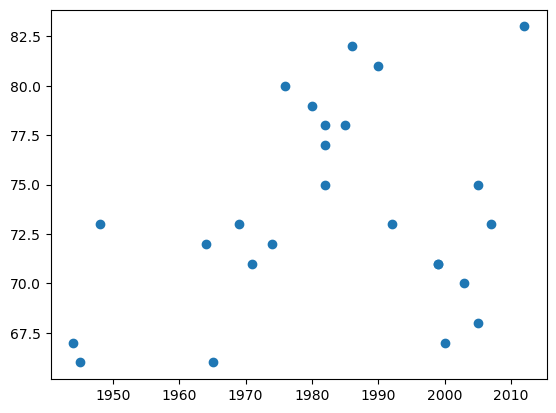

In [6]:
Oscar_con_coordenadas1 = Oscar_con_coordenadas.query("Age > 65")

# Create the scatter plot
plt.scatter(Oscar_con_coordenadas1["year_of_award_gold"], Oscar_con_coordenadas1["Age"])

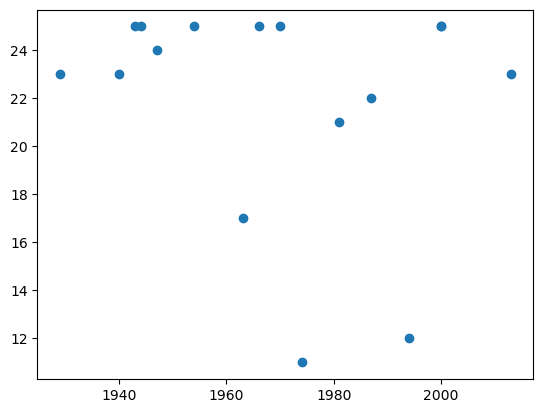

In [7]:
Oscar_con_coordenadas2 = Oscar_con_coordenadas.query("Age <= 25")
plt.scatter(Oscar_con_coordenadas2["year_of_award_gold"], Oscar_con_coordenadas2["Age"])

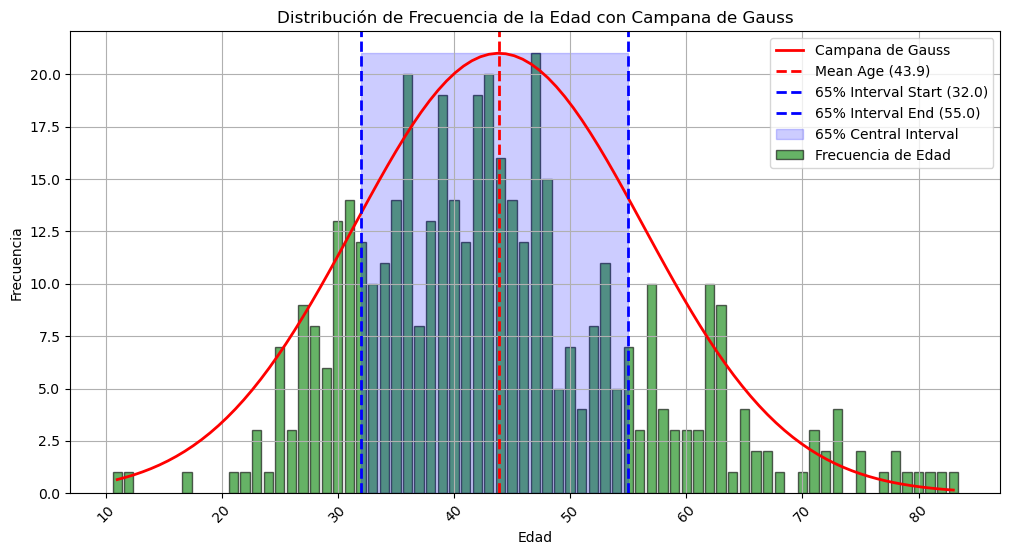

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Asumiendo que Oscar_con_coordenadas es tu DataFrame y "Age" es la columna de interés
x = Oscar_con_coordenadas["Age"]

# Contar la frecuencia de cada edad
age_counts = x.value_counts().sort_index()

# Calcular la media y la desviación estándar
mean_age = x.mean()
std_dev_age = x.std()

# Ajustar una distribución normal
xmin, xmax = x.min(), x.max()
x_values = np.linspace(xmin, xmax, 100)
pdf = stats.norm.pdf(x_values, mean_age, std_dev_age)

plt.figure(figsize=(12, 6))
plt.bar(age_counts.index, age_counts.values, color="g", edgecolor='black', alpha=0.6, label='Frecuencia de Edad')

plt.plot(x_values, pdf * max(age_counts.values) / max(pdf), 'r-', lw=2, label='Campana de Gauss')

# Calcular el intervalo central del 65%
percentile_32_5 = x.quantile(0.175)  # 65% de intervalo central -> 17.5% a cada lado
percentile_97_5 = x.quantile(0.825)

plt.axvline(mean_age, color='r', linestyle='--', linewidth=2, label=f'Mean Age ({mean_age:.1f})')
plt.axvline(percentile_32_5, color='b', linestyle='--', linewidth=2, label=f'65% Interval Start ({percentile_32_5:.1f})')
plt.axvline(percentile_97_5, color='b', linestyle='--', linewidth=2, label=f'65% Interval End ({percentile_97_5:.1f})')

plt.fill_betweenx([0, max(age_counts.values)], percentile_32_5, percentile_97_5, color='blue', alpha=0.2, label='65% Central Interval')

plt.title('Distribución de Frecuencia de la Edad con Campana de Gauss')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


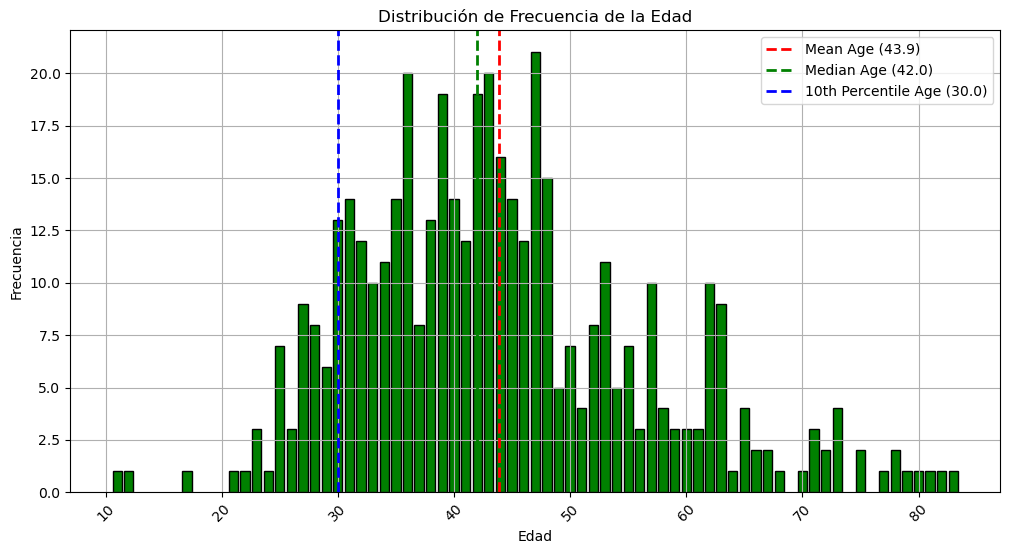

In [65]:
import matplotlib.pyplot as plt

# Asumiendo que Oscar_con_coordenadas es tu DataFrame y "Age" es la columna de interés
x = Oscar_con_coordenadas["Age"]

# Contar la frecuencia de cada edad
age_counts = x.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(age_counts.index, age_counts.values, color="g", edgecolor='black')

mean_age = x.mean()
median_age = x.median()
percentil_10 = x.quantile(0.1)

plt.axvline(mean_age, color='r', linestyle='--', linewidth=2, label=f'Mean Age ({mean_age:.1f})')
plt.axvline(median_age, color='g', linestyle='--', linewidth=2, label=f'Median Age ({median_age:.1f})')
plt.axvline(percentil_10, color='b', linestyle='--', linewidth=2, label=f'10th Percentile Age ({percentil_10:.1f})')

plt.title('Distribución de Frecuencia de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



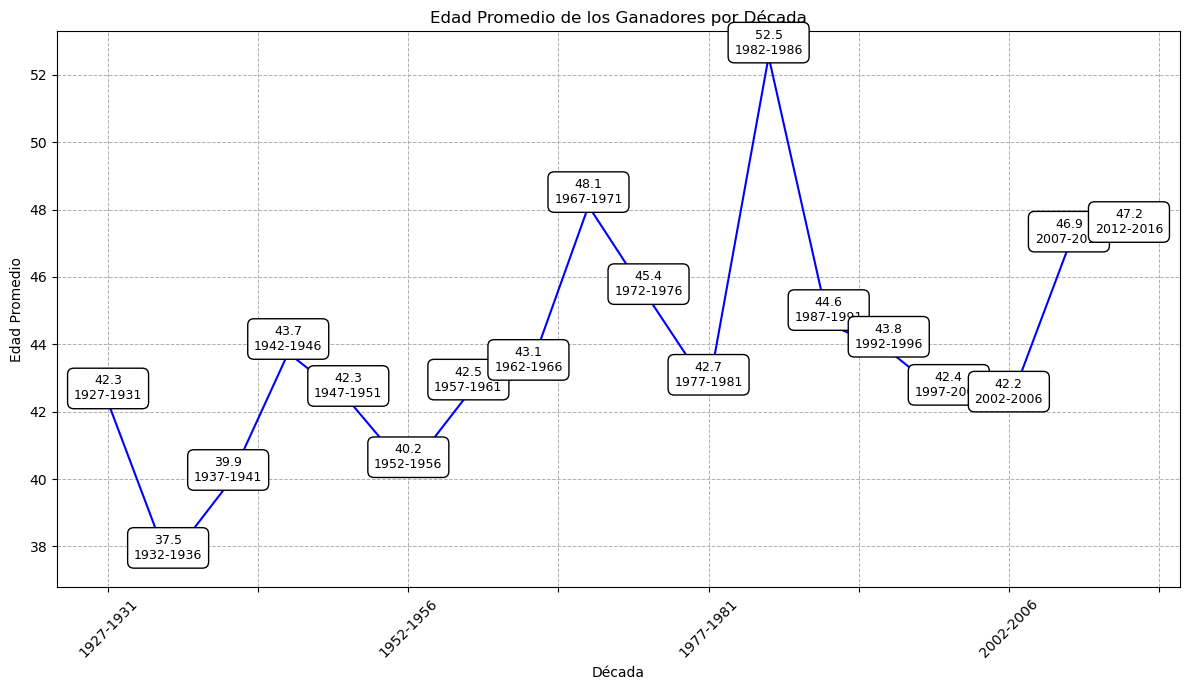

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
bins = range(int(Oscar_con_coordenadas["year_of_award"].min()), int(Oscar_con_coordenadas["year_of_award"].max()) + 5, 5)
labels = [f"{start}-{start+4}" for start in bins[:-1]]  # Intervalos de 5 años

Oscar_con_coordenadas['decade'] = pd.cut(Oscar_con_coordenadas["year_of_award"], bins=bins, labels=labels, right=False)
edad_promedio_por_decada = Oscar_con_coordenadas.groupby('decade')['Age'].mean()

# Graficar
plt.figure(figsize=(12, 7))
ax = edad_promedio_por_decada.plot(marker='o', linestyle='-', color='b')

# Añadir anotaciones
for x, (decade, age) in enumerate(edad_promedio_por_decada.items()):
    plt.text(x, age, f'{age:.1f}\n{decade}', ha='center', va='bottom', fontsize=9, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel('Década')
plt.ylabel('Edad Promedio')
plt.title('Edad Promedio de los Ganadores por Década')
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [6]:
porcentajes_orientacion = Oscar_con_coordenadas["sexual_orientation"].value_counts(normalize=True) * 100
print(porcentajes_orientacion)


sexual_orientation
Straight             92.517007
Bisexual              4.761905
Gay                   1.587302
Matter of Dispute     0.680272
Lesbian               0.453515
Name: proportion, dtype: float64


In [38]:
proporciones_por_decada = Oscar_con_coordenadas.groupby(['decade', 'sexual_orientation']).size().unstack().fillna(0)

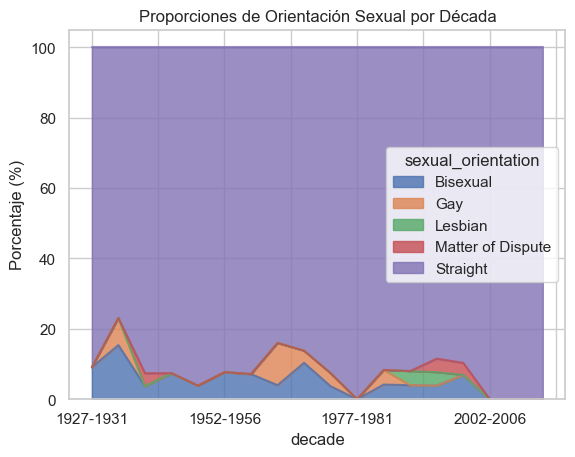

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame Oscar_con_coordenadas con las columnas 'decade' y 'sexual_orientation'

# Calcular las proporciones por década y orientación sexual
proporciones_por_decada = Oscar_con_coordenadas.groupby(['decade', 'sexual_orientation']).size().unstack().fillna(0)

# Convertir a porcentajes
proporciones_por_decada = proporciones_por_decada.div(proporciones_por_decada.sum(axis=1), axis=0) * 100

# Graficar
proporciones_por_decada.plot.area(alpha = 0.8)
plt.ylabel('Porcentaje (%)')
plt.title('Proporciones de Orientación Sexual por Década')
plt.show()


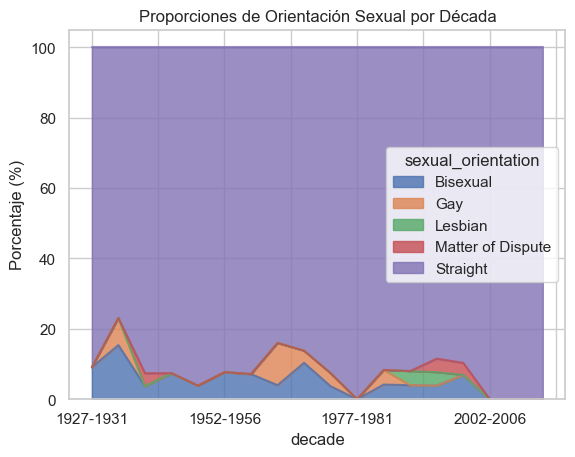

In [47]:
Oscar_con_coordenadas.pivot_table(index='decade', columns='sexual_orientation', aggfunc='size', fill_value=0) \
    .apply(lambda x: x / x.sum() * 100, axis=1) \
    .plot.area(alpha= 0.8)

plt.ylabel('Porcentaje (%)')
plt.title('Proporciones de Orientación Sexual por Década')
plt.show()

In [7]:
Oscar_con_coordenadas.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold',
       'Coordinates', 'Age', 'decade'],
      dtype='object')

In [17]:
print(Oscar_con_coordenadas['religion'] == 'Na')

0      False
1      False
2      False
3      False
4      False
       ...  
436    False
437    False
438    False
439    False
440    False
Name: religion, Length: 441, dtype: bool


In [9]:

Oscar_con_coordenadas.loc[Oscar_con_coordenadas['religion'] == 'Na', 'religion'] = 'Roman_Catholic'



In [18]:
Oscar_con_coordenadas.loc[Oscar_con_coordenadas.query('religion == "Na"').index, 'religion'] = 'Roman_Catholic'


In [ ]:
create_map_folium(r"C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregrado\Data_used\processed\Oscars_con_coordenadas.csv")

In [19]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json


# Adding 'gender' column to the DataFrame if it does not exist
if 'gender' not in Oscar.columns:
    Oscar['gender'] = np.nan

def actualizar_genero(data: pd.DataFrame) -> pd.DataFrame:
    """Realiza scrapping del género en la página encontrada en la columna 'biourl'."""
    
    cols = ['biourl', 'person', 'gender']
    for index, row in data[data[cols].isnull().any(axis=1)][cols].iterrows():
        url = row['biourl']
        person_name = row['person']
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an HTTPError for bad responses
            
            soup = BeautifulSoup(response.content, "html.parser")
            
            # Busca el género dentro del script JSON-LD
            scripts = soup.find_all("script", type="application/ld+json")
            for script in scripts:
                script_content = script.string
                if '"gender":' in script_content:
                    gender_info = script_content.split('"gender": "')[1].split('"')[0]
                    data.loc[data['person'] == person_name, 'gender'] = gender_info
                    break
        except requests.RequestException as e:
            print(f"Error accessing the page {url}: {e}")
        except Exception as e:
            print(f"Error processing the data for {person_name}: {e}")
        
    return data

Oscar = actualizar_genero(Oscar)

Primera idea: Ver como cambia, atravz del tiempo, la proporcion de entrega de premios en los continentes y paises.

Grafico de barras apiladas
x --> Total de premios por pais/Continente cada 5 años o 10 años.
y --> Paises/continentes.

Segunda idea:

Edad de los ganadores por cada 5 o 10 años.  Edad promedio de los ganadores por año? por sexo?

Tercera idea idea:  Paises con mayo numero de premios.
Grafico de barras

Cuarta idea: Moment of sexual orientation get more diverse

Quinta idea: Momento of race ethnicity get more diverse

Sexta idea: Asociacion entre orientacíon sexual y el tipo de award.


In [ ]:
import requests
from bs4 import BeautifulSoup
import json

def fetch_books(page_number):
  url = f"https://www.imdb.com/find/?q={Nombre_pelicula}&ref_=nv_sr_sm"
  response = requests.get(url,  headers={"User-Agent": "Chrome"})
  soup = BeautifulSoup(response.text, 'html.parser')

  books = []
  book_elements = soup.find_all('article', class_='product_pod')

# <h3 class="ipc-titles__text"> "Títulos"

  for book in book_elements:
    #title = book.find('h3').find('a')['title']
    #price = book.find('p', class_='price_color').text
    #stock = 'In stock' if 'In stock' in book.find('p', class_='instock availability').text else 'Out of stock'
    #rating = book.find('p', class_='star-rating')['class'][1]
    #link = book.find('h3').find('a')['href']

    books.append({
      'title': title,
      'price': price,
      'stock': stock,
      'rating': rating,
      'link': f"https://books.toscrape.com/catalogue/{link}"
    })

  return books

def main():
  all_books = []
  max_pages = 10

  for current_page in range(1, max_pages + 1):
    books_on_page = fetch_books(current_page)
    all_books.extend(books_on_page)
    print(f"Books on page {current_page}: {books_on_page}")

  # Save data to file
  with open('books.json', 'w') as f:
    json.dump(all_books, f, indent=2)

  print('Data is saved to books.json')

if __name__ == "__main__":
  main()

In [14]:
import requests
from bs4 import BeautifulSoup
import json
import re

Nombre_pelicula = "avenger"

url_level_o = f"https://www.imdb.com/find/?q={Nombre_pelicula}&ref_=nv_sr_sm"
response = requests.get(url_level_o, headers={"User-Agent": "Chrome"})
soup = BeautifulSoup(response.text, 'html.parser')
books = [print(element.get_text()) or element.get_text() for element in soup.find_all('li', class_="ipc-metadata-list-summary-item ipc-metadata-list-summary-item--click find-result-item find-title-result", limit=1)]
# prints --> "Captain America: The First Avenger2011Chris Evans, Hugo Weaving"

url_level_1 = f"https://www.imdb.com/title/{Srap_id_movie}/?ref_=fn_al_tt_{Directorio_pelicula}"

year = soup()
Srap_id_movie = soup.finda_ll("a", url= url_level_1 , class_="ipc-metadata-list-summary-item__t", books = books.split(Year)[0])

soup.find_all(url = url_level_1 ,books = books[0], re.compile())

<a class="ipc-link ipc-link--baseAlt ipc-link--inherit-color" role="button" tabindex="0" aria-disabled="false" href="/title/tt0458339/releaseinfo?ref_=tt_ov_rdat">2011</a>
<a  role="button" tabindex="0" aria-disabled="false" href="/title/tt0458339/?ref_=fn_al_tt_1">Capitán América: El primer vengador</a>
## Strings that contain 'Link'



Captain America: The First Avenger2011Chris Evans, Hugo Weaving


In [15]:
Oscar["birthplace"].unique()

array(['Chisinau_Moldova', 'Rorschach_Switzerland', 'Philadelphia_Pa',
       'Glasgow_Scotland', 'London_England', 'Columbus_Oh',
       'Toronto_Ontario_Canada', 'Montreal_Quebec_Canada',
       'Cobourg_Ontario_Canada', 'Washington_Dc', 'Kansas_City_Mo',
       'Chicago_Il', 'Salt_Lake_City_Ut', 'Hartford_Ct',
       'Victoria_Hotel_Scarborough_Yorkshire_England', 'Paris_France',
       'Bisacquino_Sicily_Italy', 'Cadiz_Oh', 'Lowell_Ma',
       'Cape_Elizabeth_Me', 'Tunbridge_Wells_Kent_England',
       'Lviv_Ukraine', 'Dusseldorf_Germany', 'Litchfield_Mn',
       'Milwaukee_Wi', 'Swampscott_Ma', 'Vienna_Austria',
       'Los_Angeles_Ca', 'New_York_City', 'Darjeeling_India',
       'Elizabeth_Nj', 'Withington_Manchester_England', 'Tokyo_Japan',
       'Pasadena_Ca', 'Wichita_Ks', 'Indiana_Pa', 'Independence_Mo',
       'Palmyra_Mo', 'Quincy_Il', 'Helena_Mt',
       'Mulhouse_HautRhin_Alsace_France', 'Walters_Ok', 'Manhattan_Ny',
       'Budapest_Hungary', 'Athens_Greece', 'Tulsa_Ok'

In [13]:
Oscar["award"].value_counts()

award
Best_Actress               95
Best_Director              91
Best_Actor                 88
Best_Supporting_Actress    85
Best_Supporting_Actor      82
Name: count, dtype: int64